<a href="https://colab.research.google.com/github/AlinaLevitin/Assignments/blob/main/Cell_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_rows', 60)

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MiniProjects/Cell Cycle/wt_cin8.csv')
data_raw

,Length (px),Length um,Cin8-3GFP Signal,Spindle in wrong place,Cin8 on astral,Tripolar,Mother size (px),Bud size (px)
0,36.900,4.722,NaN,NaN,NaN,NaN,43.841,26.870
1,3.606,0.462,D,NaN,NaN,NaN,33.061,13.038
2,28.160,3.604,NaN,NaN,NaN,NaN,43.417,24.331
3,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,M,NaN,NaN,NaN,NaN,40.497,13.601
...,...,...,...,...,...,...,...,...
209,22.847,2.924,NaN,NaN,NaN,NaN,35.057,23.195
210,10.630,1.361,NaN,NaN,NaN,NaN,44.654,29.069
211,57.871,7.407,NaN,NaN,NaN,NaN,39.850,29.530
212,40.460,5.179,NaN,NaN,NaN,NaN,35.903,24.166


In [ ]:
data_raw.drop(['Length (px)'], axis=1, inplace=True)
data_raw

,Length um,Cin8-3GFP Signal,Spindle in wrong place,Cin8 on astral,Tripolar,Mother size (px),Bud size (px)
0,4.722,NaN,NaN,NaN,NaN,43.841,26.870
1,0.462,D,NaN,NaN,NaN,33.061,13.038
2,3.604,NaN,NaN,NaN,NaN,43.417,24.331
3,U,NaN,NaN,NaN,NaN,NaN,NaN
4,M,NaN,NaN,NaN,NaN,40.497,13.601
...,...,...,...,...,...,...,...
209,2.924,NaN,NaN,NaN,NaN,35.057,23.195
210,1.361,NaN,NaN,NaN,NaN,44.654,29.069
211,7.407,NaN,NaN,NaN,NaN,39.850,29.530
212,5.179,NaN,NaN,NaN,NaN,35.903,24.166


In [ ]:
data_raw['MB ratio'] = data_raw['Bud size (px)']/data_raw['Mother size (px)']
data_raw.drop(['Mother size (px)'], axis=1, inplace=True)
data_raw.drop(['Bud size (px)'], axis=1, inplace=True)
data_raw.fillna(0, inplace=True)
data_raw

,Length um,Cin8-3GFP Signal,Spindle in wrong place,Cin8 on astral,Tripolar,MB ratio
0,4.722,0,0,0,0,0.612897
1,0.462,D,0,0,0,0.394362
2,3.604,0,0,0,0,0.560403
3,U,0,0,0,0,0.000000
4,M,0,0,0,0,0.335852
...,...,...,...,...,...,...
209,2.924,0,0,0,0,0.661637
210,1.361,0,0,0,0,0.650983
211,7.407,0,0,0,0,0.741029
212,5.179,0,0,0,0,0.673091


In [ ]:
data_mapped = data_raw.copy()
data_mapped['Cin8-3GFP Signal'] = data_mapped['Cin8-3GFP Signal'].map({0:0, 'D':1, 'N':2})
data_mapped['Spindle in wrong place'] = data_mapped['Spindle in wrong place'].map({0:0, 'B':1})
data_mapped['Cin8 on astral'] = data_mapped['Cin8 on astral'].map({0:0, 'A':1})
data_mapped['Tripolar'] = data_mapped['Tripolar'].map({0:0, 'F':1, 'T':2})
data_mapped['Cell Type'] = data_mapped['Length um'].map({'U': 1, 'M': 2})
data_mapped['Length um'].replace('U', 0.0, inplace=True)
data_mapped['Length um'].replace('M', 0.0, inplace=True)
data_mapped['Length um'].replace('P', 0.0, inplace=True)
data_mapped['Cell Type'].fillna(0, inplace=True)
data_mapped.head(5)


,Length um,Cin8-3GFP Signal,Spindle in wrong place,Cin8 on astral,Tripolar,MB ratio,Cell Type
0,4.722,0,0,0,0,0.612897,0.0
1,0.462,1,0,0,0,0.394362,0.0
2,3.604,0,0,0,0,0.560403,0.0
3,0.0,0,0,0,0,0.000000,1.0
4,0.0,0,0,0,0,0.335852,2.0


In [ ]:
data=data_mapped.copy()
col = data.columns
new_col = ['Cell Type', 'Length um', 'MB ratio', 'Cin8-3GFP Signal', 'Spindle in wrong place', 'Cin8 on astral', 'Tripolar']
data_final=data[new_col]
data_final


,Cell Type,Length um,MB ratio,Cin8-3GFP Signal,Spindle in wrong place,Cin8 on astral,Tripolar
0,0.0,4.722,0.612897,0,0,0,0
1,0.0,0.462,0.394362,1,0,0,0
2,0.0,3.604,0.560403,0,0,0,0
3,1.0,0.0,0.000000,0,0,0,0
4,2.0,0.0,0.335852,0,0,0,0
...,...,...,...,...,...,...,...
209,0.0,2.924,0.661637,0,0,0,0
210,0.0,1.361,0.650983,0,0,0,0
211,0.0,7.407,0.741029,0,0,0,0
212,0.0,5.179,0.673091,0,0,0,0


In [ ]:
x = data_final.iloc[:, 0:3]
x['Length um'] = x['Length um'].astype(float)
x

,Cell Type,Length um,MB ratio
0,0.0,4.722,0.612897
1,0.0,0.462,0.394362
2,0.0,3.604,0.560403
3,1.0,0.000,0.000000
4,2.0,0.000,0.335852
...,...,...,...
209,0.0,2.924,0.661637
210,0.0,1.361,0.650983
211,0.0,7.407,0.741029
212,0.0,5.179,0.673091


In [ ]:
x_scaled =preprocessing.scale(x)

In [ ]:
wcss=[]
for i in range(1,15):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

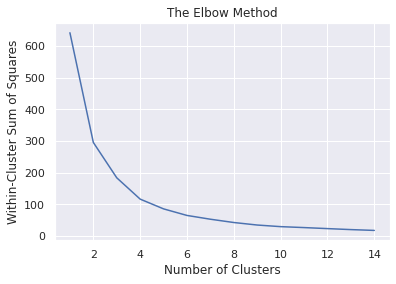

In [ ]:
number_clusters = range(1,15)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

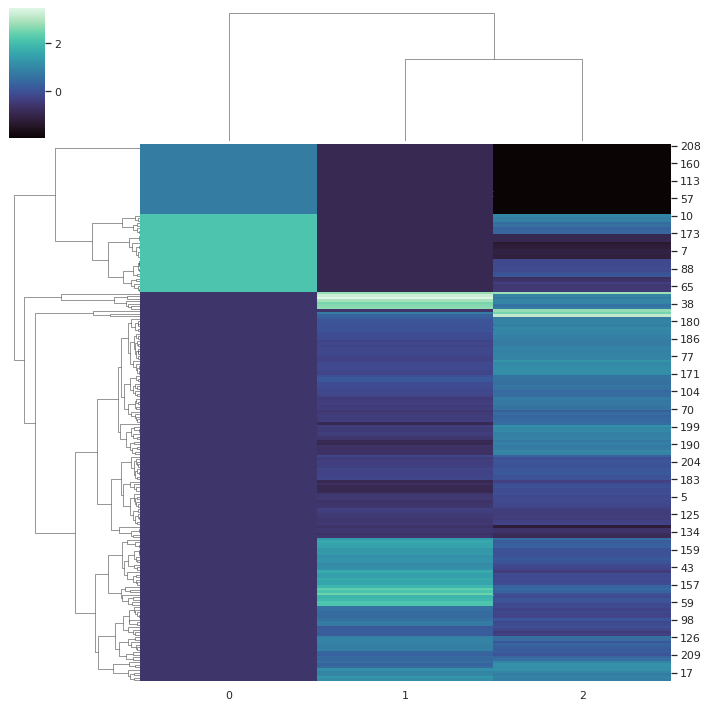

In [ ]:
sns.clustermap(x_scaled, cmap='mako')

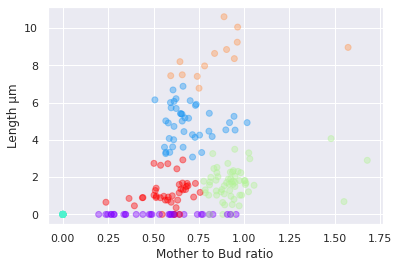

In [ ]:
kmeans = KMeans(6)
kmeans.fit(x_scaled)
identefied_clusters = kmeans.fit_predict(x_scaled)
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identefied_clusters
plt.scatter(x['MB ratio'], x['Length um'], c=data_with_clusters['Clusters'], cmap='rainbow', alpha=0.4)
plt.xlabel('Mother to Bud ratio')
plt.ylabel('Length µm')
plt.show()

In [ ]:
data_with_clusters

,Cell Type,Length um,MB ratio,Clusters
0,0.0,4.722,0.612897,1
1,0.0,0.462,0.394362,5
2,0.0,3.604,0.560403,1
3,1.0,0.000,0.000000,2
4,2.0,0.000,0.335852,0
...,...,...,...,...
209,0.0,2.924,0.661637,5
210,0.0,1.361,0.650983,5
211,0.0,7.407,0.741029,4
212,0.0,5.179,0.673091,1


In [ ]:
data_with_clusters['Count'] = 1
count = data_with_clusters.groupby(by='Clusters').count()

In [ ]:
summary = data_with_clusters.groupby(by='Clusters').mean()
std = data_with_clusters.groupby(by='Clusters').std()
sem = data_with_clusters.groupby(by='Clusters').sem()
summary['Length µm SEM'] = sem.iloc[:, 1]
summary['MB ratio SEM'] = sem.iloc[:, 2]
summary['Count'] = count['Count']
sum_col = summary.columns
new_col = ['Cell Type', 'Count', 'Length um', 'Length µm SEM', 'MB ratio', 'MB ratio SEM']
summary=summary[new_col].round(2)
summary


,Cell Type,Count,Length um,Length µm SEM,MB ratio,MB ratio SEM
Clusters,,,,,,
0,2.0,31,0.00,0.00,0.54,0.04
1,0.0,42,4.86,0.15,0.69,0.02
2,1.0,28,0.00,0.00,0.00,0.00
3,0.0,60,1.67,0.11,0.94,0.02
4,0.0,13,8.46,0.30,0.87,0.07
5,0.0,40,1.17,0.12,0.58,0.02


**Cell types:**\
0 = Mitosis\
1 = Unbudded\
2 = Monopolar

<BarContainer object of 6 artists>

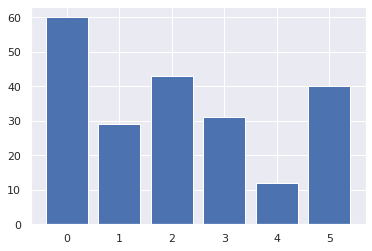

In [ ]:
plt.bar(range(0,len(histogram)), histogram)